In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
config = {
    "font.family": 'serif',
    "mathtext.fontset": 'stix',
    "font.sans-serif": ['Times New Roman'],
}
plt.rcParams.update(config)
import seaborn as sns

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import clone
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import shap,re

In [38]:
df = pd.read_csv('data/atom_df_ori.csv')
scaler = StandardScaler()
df.iloc[:,:-4] = scaler.fit_transform(df.iloc[:,:-4])
df.columns = [re.sub(r'(\d)', r'$_\1$', col) for col in df.columns]
df

,CH$_4$,H$_2$,C$_2$H$_4$,C$_2$H$_6$,Mg,Ti,Cr,Mn,Fe,Co,...,La,Ce,Pr,Nd,Sm,Gd,BI,PE,RS,SP
0,1.726798,1.848120,-1.581724,-1.150542,1.757763,-0.417895,-0.549530,-0.779865,-0.548067,1.224479,...,-0.893837,-0.882925,-0.880540,-0.680984,-0.879364,-0.452266,0.0,0.0,1.0,0.0
1,-0.378611,-0.680214,-0.416891,-0.934510,2.728890,-0.417895,-0.549530,-0.779865,-0.548067,1.072815,...,-0.893837,-0.882925,-0.880540,-0.680984,-0.879364,-0.452266,0.0,0.0,1.0,0.0
2,3.145705,3.078143,-1.432113,-1.104599,1.649859,-0.417895,-0.549530,-0.779865,-0.548067,2.132647,...,-0.893837,-0.882925,-0.880540,-0.680984,-0.879364,-0.452266,0.0,0.0,1.0,0.0
3,3.106090,2.785203,-1.542540,-1.147610,1.677411,-0.417895,-0.549530,-0.779865,-0.548067,0.976491,...,-0.893837,-0.882925,-0.880540,-0.680984,-0.879364,-0.452266,0.0,0.0,1.0,0.0
4,0.361774,-0.277523,-1.380461,-1.051813,1.455414,-0.417895,-0.549530,-0.779865,-0.548067,0.997458,...,-0.893837,-0.882925,-0.880540,-0.680984,-0.879364,-0.452266,0.0,0.0,1.0,0.0
5,2.285727,1.999604,-1.136452,-0.970678,1.492095,-0.417895,-0.549530,-0.779865,-0.548067,1.036997,...,-0.893837,-0.882925,-0.880540,-0.680984,-0.879364,-0.452266,0.0,0.0,1.0,0.0
6,-0.640926,-1.003775,0.345415,-0.488761,-0.608189,-0.417895,2.212672,1.727093,2.237899,1.244595,...,-0.893837,-0.882925,-0.880540,-0.680984,-0.879364,-0.452266,0.0,0.0,0.0,1.0
7,-0.645539,-0.875055,0.023038,-0.604108,-0.608189,-0.417895,3.165525,1.479694,1.947657,1.091542,...,-0.893837,-0.882925,-0.880540,-0.680984,-0.879364,-0.452266,0.0,0.0,0.0,1.0
8,-0.215960,-0.698912,-0.025051,-0.411536,-0.608189,-0.417895,1.913736,2.527864,1.990678,1.092266,...,-0.893837,-0.882925,-0.880540,-0.680984,-0.879364,-0.452266,0.0,0.0,0.0,1.0
9,-0.347647,-0.933589,0.984827,0.126100,-0.608189,-0.417895,1.937124,1.437406,3.194615,1.091769,...,-0.893837,-0.882925,-0.880540,-0.680984,-0.879364,-0.452266,0.0,0.0,0.0,1.0


In [39]:
random_seed = 2024
models = [RandomForestRegressor(n_estimators=100, max_features='sqrt', n_jobs=-1, random_state=random_seed),
    ExtraTreesRegressor(n_estimators=100, max_features='sqrt', n_jobs=-1, random_state=random_seed),
    DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=random_seed),
    XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=random_seed),
    CatBoostRegressor(iterations=500, learning_rate=0.05, depth=6, verbose=0, random_seed=random_seed),
    KNeighborsRegressor(n_neighbors=5, algorithm='auto', n_jobs=-1),
    SVR(kernel='rbf', C=1e3, gamma=0.1),
]
X = df.iloc[:, 4:]
Y = df.iloc[:, :4]
model_names = ['RF','ET', 'DT', 'XGB', 'CB','KNN','SVM']



results = {}

# cross validation
for model, model_name in zip(models, model_names):
    for i in range(4):
        kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)
        model_score = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
            model.fit(X_train, Y_train.iloc[:, i])
            model_score.append(r2_score(Y_test.iloc[:, i], model.predict(X_test)))
        results[f'{model_name}_{Y.columns[i]}'] = np.mean(model_score)

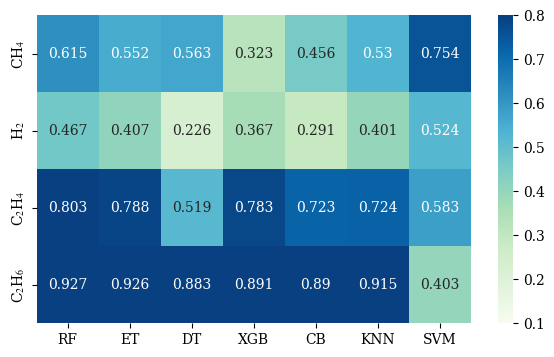

In [40]:
r2_map = np.zeros((4,len(model_names)))
for i,m in enumerate(model_names):
    for j,d in enumerate(Y.columns):
        r2_map[j,i] = results[f'{m}_{d}']

fig = plt.figure(figsize=(7,4))
sns.heatmap(r2_map,annot=True,fmt='.3g',xticklabels=model_names,yticklabels=Y.columns,cmap='GnBu',vmin=0.1,vmax=0.8)
plt.show()

In [50]:
test_df = pd.read_csv('data/test.csv')
test_df.iloc[:,:-4]=scaler.transform(test_df.iloc[:,:-4])
model = RandomForestRegressor(n_estimators=100, max_features='sqrt', n_jobs=-1, random_state=42)
model.fit(X, Y.iloc[:, 3])
pred = model.predict(test_df.iloc[:, 4:])
print('The predicted test sample ethane yield is '+str(pred*scaler.scale_[3]+scaler.mean_[3]))

The predicted test sample ethane yield is [47.6633]


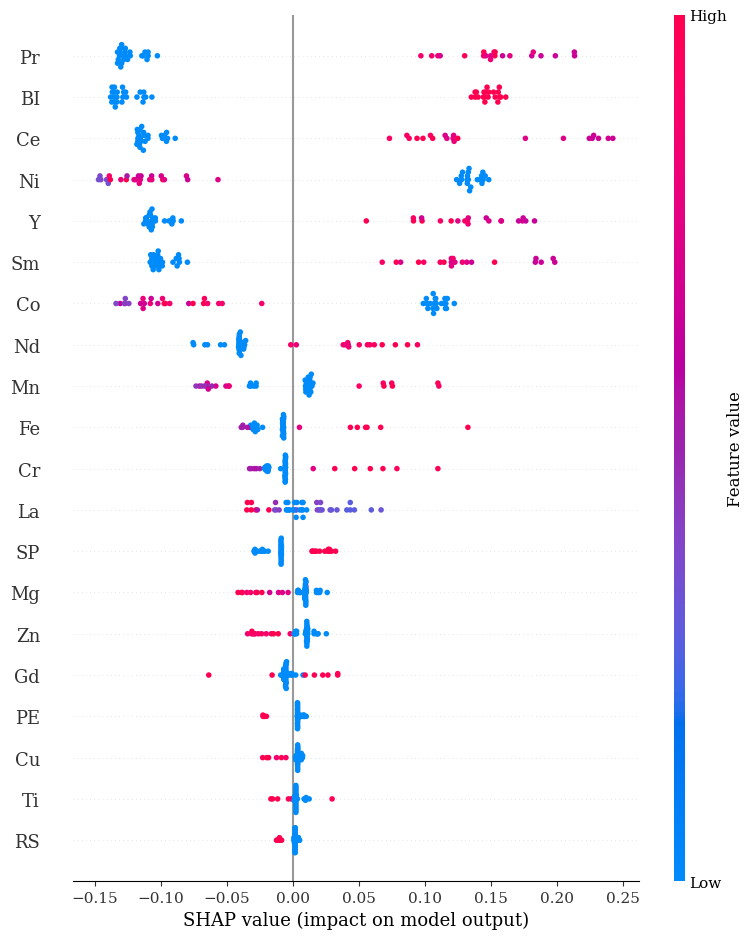

In [51]:
#ethane
accumulated_shap_values = None

# set diffrent random seeds to get the average SHAP values
random_seeds = range(10)
for seed in random_seeds:
    model = RandomForestRegressor(n_estimators=100, max_features='sqrt', n_jobs=-1, random_state=seed)
    model.fit(X, Y.iloc[:, 3])
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)

    if accumulated_shap_values is None:
        accumulated_shap_values = np.array(shap_values)
    else:
        accumulated_shap_values += shap_values

# calculate the average SHAP values
average_shap_values = accumulated_shap_values / len(random_seeds)

shap.summary_plot(average_shap_values, X)

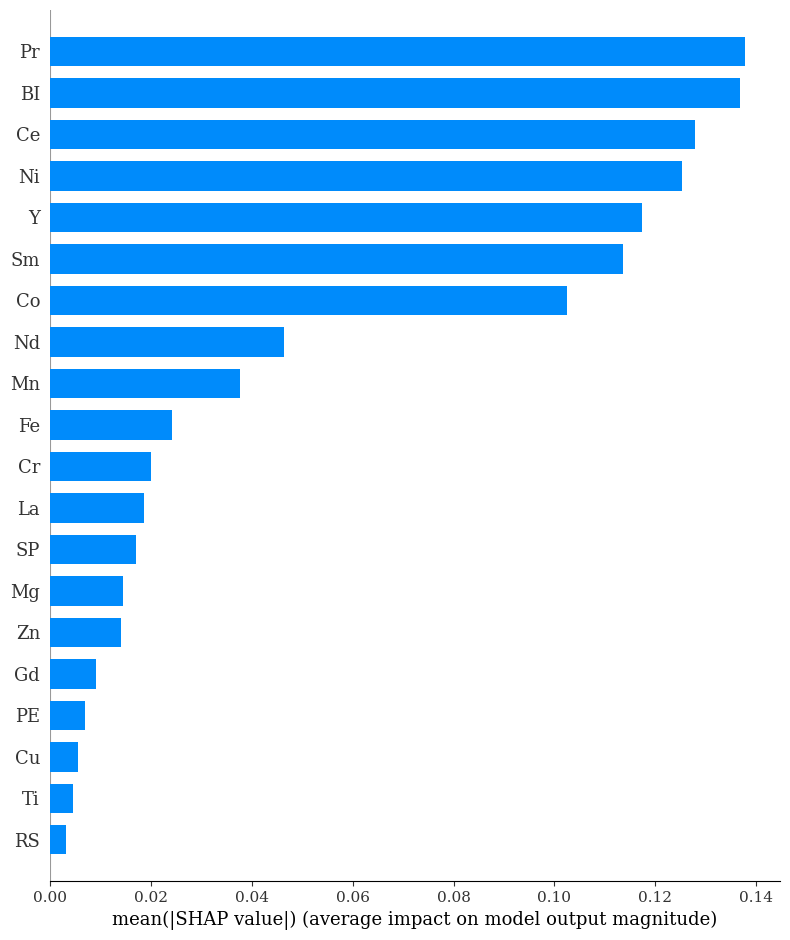

In [36]:
shap.summary_plot(average_shap_values, X, plot_type="bar")